In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

# Bootstrapping

Una parte central de cualquier modelo estadístico es poder calcular la incertidumbre asociada a sus parámetros.
En los métodos MCMC las incertidumbres se pueden calcular numéricamente. ¿Pero qué hacer con otros métodos que no son Bayesianos?

Una de las posibilidades

In [99]:
data = pd.read_csv('../06.RegresionLineal/Cars93.csv')

In [103]:
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [111]:
X = data[['Horsepower', 'Turn.circle']]
Y = data['Price'].values.reshape(-1,1)

In [112]:
import sklearn.model_selection

In [113]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r_2_train = np.ones(n_boot)
r_2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r_2_train[i] = linear.score(X_train, Y_train)
    r_2_validation[i] = linear.score(X_validation, Y_validation) 

In [114]:
r_2_train.mean(), r_2_validation.mean()

(0.64544439587719149, 0.55096666779771319)

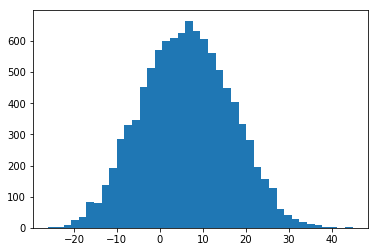

In [95]:
_ = plt.hist(beta_0, bins=40)

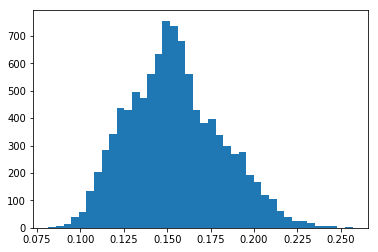

In [96]:
_ = plt.hist(beta_1, bins=40)

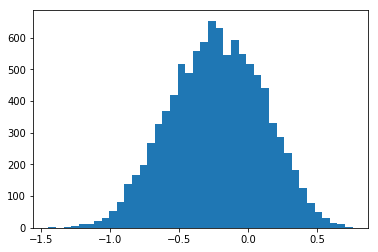

In [97]:
_ = plt.hist(beta_2, bins=40)

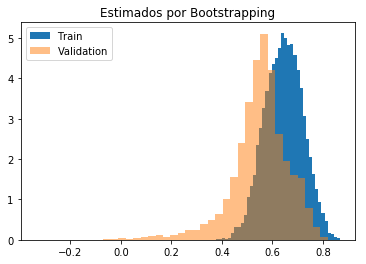

In [98]:
_ = plt.hist(r_2_train, bins=40, density=True, label='Train')
_ = plt.hist(r_2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

Cual son las principales diferencias entre training, validation and test?

- training: datos para encontrar los parámetros del modelo dado un método estadístico. En este caso los beta con mínimos cuadrados.
- validation: datos para tomar decisiones sobre el método estadístico y, en algunos casos, el modelo mismo. En este caso, descartar alguno de los coeficientes.
- test: datos independientes para medir el rendimiento de un modelo y un método estadístico determinado.

In [116]:
X = data[['Horsepower', 'Turn.circle', 'MPG.highway', 'EngineSize', 'Width', 'Weight']]
Y = data['Price'].values.reshape(-1,1)

n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r_2_train = np.ones(n_boot)
r_2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r_2_train[i] = linear.score(X_train, Y_train)
    r_2_validation[i] = linear.score(X_validation, Y_validation) 

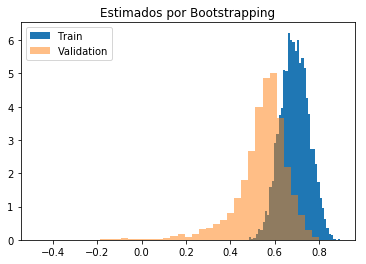

In [108]:
_ = plt.hist(r_2_train, bins=40, density=True, label='Train')
_ = plt.hist(r_2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

In [117]:
r_2_train.mean(), r_2_validation.mean()

(0.72299445196806866, 0.58108891895296721)